In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare tracer name and initial condition

In [2]:
from read_results import read_varnames
nvar = 34
varnames = read_varnames("strato_code/strato_Parameters.f90")[0:nvar]
print(varnames)

['CH3', 'Cl2', 'Cl2O2', 'ClOO', 'OClO', 'BrCl', 'HOBr', 'BrONO2', 'HCO', 'CH3O', 'O1D', 'N2O5', 'HBr', 'CH3OOH', 'HNO4', 'HCl', 'H2O2', 'HOCl', 'HNO3', 'H', 'CH3O2', 'ClONO2', 'NO3', 'CH2O', 'Br', 'OH', 'Cl', 'ClO', 'O3', 'NO', 'BrO', 'O', 'HO2', 'NO2']


In [3]:
df_init = pd.Series(data=1e-8, index=varnames)
df_init.shape

(34,)

In [4]:
with open ("strato_code/strato_Initialize.f90", "r") as f:
    code_str = f.readlines()

for i, line in enumerate(code_str):
    if 'VAR(1)' in line:
        startline = i
        break

CFACTOR = 8.120000e+16
for i in range (nvar):
    df_init[i] = eval(code_str[startline+i].split()[-1])

In [5]:
df_init.head()

CH3         3.235355
Cl2      7036.531348
Cl2O2    5768.445564
ClOO      215.935647
OClO     5841.169096
dtype: float64

# Run integrator

In [6]:
import strato_code.kpp4py as kpp

In [7]:
%time y_history = kpp.forward(df_init.values, 72)
y_history.shape

CPU times: user 10.8 ms, sys: 242 µs, total: 11.1 ms
Wall time: 11.1 ms


(35, 72)

In [8]:
df_history = pd.DataFrame(y_history.T, columns=varnames+['SUN'])
df_history.index.name = 'time'
df_history.head()

,CH3,Cl2,Cl2O2,ClOO,OClO,BrCl,HOBr,BrONO2,HCO,CH3O,...,OH,Cl,ClO,O3,NO,BrO,O,HO2,NO2,SUN
time,,,,,,,,,,,,,,,,,,,,,
0,3.234628,6739.494384,5791.628256,217.315939,5844.714250,4751.069052,410747.322915,7623.857356,0.024642,202.797077,...,1.655987e+07,715535.902465,8.235015e+07,5.292275e+11,8.739400e+08,918443.072893,6.590324e+08,1.166693e+07,2.240409e+08,1.000000
1,3.224996,6685.439159,5816.405716,218.173554,5859.333303,4762.888190,409456.999496,7633.898411,0.024619,202.261306,...,1.650100e+07,718359.932959,8.249465e+07,5.259771e+11,8.746498e+08,918391.242797,6.541997e+08,1.162177e+07,2.241613e+08,0.999220
2,3.161609,6802.822195,5883.507207,216.283073,5939.809826,4828.388417,409706.775265,7814.912451,0.024159,198.349859,...,1.621275e+07,712134.147492,8.254032e+07,5.224611e+11,8.727696e+08,919652.457798,6.374849e+08,1.147695e+07,2.264624e+08,0.987575
3,2.917805,7357.660661,6122.898412,205.454262,6274.013759,5100.617745,415386.392560,8663.252882,0.022349,183.162555,...,1.513317e+07,676473.263380,8.232835e+07,5.173035e+11,8.620172e+08,925248.039594,5.804342e+08,1.098227e+07,2.369791e+08,0.938153
4,2.353436,9050.498768,6782.410995,177.939929,7255.742131,5900.595317,433599.474331,11445.999688,0.018151,147.913039,...,1.253191e+07,585865.163704,8.144778e+07,5.090709e+11,8.297395e+08,937897.232885,4.539145e+08,9.793042e+06,2.677609e+08,0.813302


/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


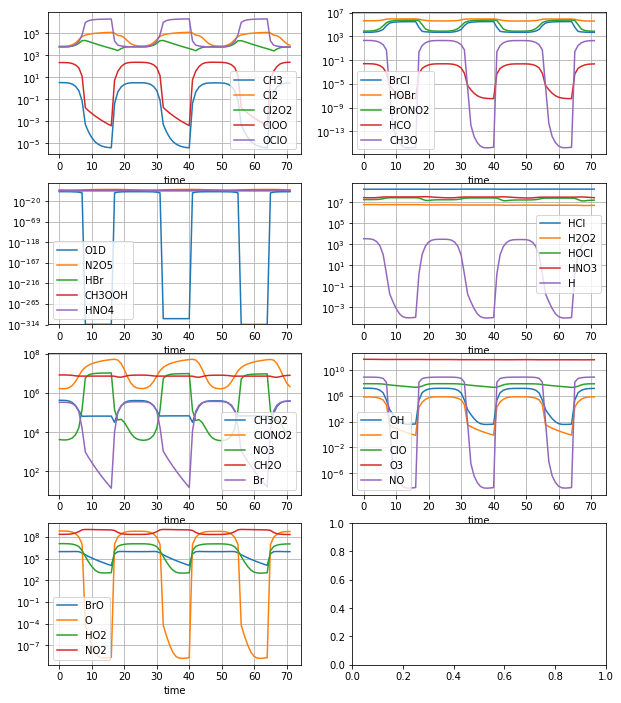

In [9]:
N_sub = 5 
N_figures = 8

fig, axes = plt.subplots(N_figures//2, 2, figsize=[10, 12])

for i in range(N_figures-1):
    sub_name = varnames[i*N_sub:(i+1)*N_sub]
    df_history.plot(y=sub_name, logy=True, grid=True, ax=axes.ravel()[i])

# Write data range to file

In [10]:
df_range = df_history.drop('SUN', axis=1).agg(['min', 'max']).T
df_range.clip_lower(1e-8, inplace=True)
df_range.head(10)

,min,max
CH3,3.685817e-06,3.234628e+00
Cl2,6.685439e+03,1.245632e+05
Cl2O2,2.478591e+03,2.227402e+04
ClOO,3.769876e-04,2.320970e+02
OClO,5.689835e+03,2.060717e+06
BrCl,4.626044e+03,3.018356e+05
HOBr,3.703886e+05,8.473285e+05
BrONO2,7.216404e+03,5.382783e+05
HCO,3.274070e-08,2.464155e-02
CH3O,1.000000e-08,2.027971e+02


In [11]:
df_range.to_csv('strato_range.csv')

# One time step, different initial condition

In [12]:
df_history.values.shape

(72, 35)

In [13]:
y_rerun = kpp.onestep(df_history.values.T).T
y_rerun.shape

(72, 34)

In [14]:
df_rerun = pd.DataFrame(y_rerun, columns=varnames)
df_rerun.index.name = 'time'
df_rerun.head()

,CH3,Cl2,Cl2O2,ClOO,OClO,BrCl,HOBr,BrONO2,HCO,CH3O,...,Br,OH,Cl,ClO,O3,NO,BrO,O,HO2,NO2
time,,,,,,,,,,,,,,,,,,,,,
0,3.228875,6677.964100,5812.988540,218.359717,5854.466863,4758.922944,409349.089078,7621.706232,0.024647,202.502959,...,329824.000227,1.651757e+07,718972.996554,8.249867e+07,5.260104e+11,8.748193e+08,918298.181391,6.550805e+08,1.162901e+07,2.240014e+08
1,3.219064,6690.367387,5831.788361,219.059073,5866.167877,4768.393276,408086.927408,7629.325466,0.024582,201.930382,...,330993.747031,1.645934e+07,721275.917794,8.260094e+07,5.229523e+11,8.753181e+08,918263.639787,6.504892e+08,1.158487e+07,2.240519e+08
2,3.154832,6853.223618,5893.376565,217.102491,5943.966861,4831.725734,408229.080038,7806.215242,0.024084,197.942583,...,329277.003835,1.616847e+07,714832.509003,8.260808e+07,5.191963e+11,8.733183e+08,919530.970813,6.335563e+08,1.143732e+07,2.262506e+08
3,2.908203,7547.844441,6124.077231,206.396306,6274.426072,5100.908527,413244.838372,8642.058628,0.022174,182.544821,...,317629.649128,1.507481e+07,679575.517385,8.234004e+07,5.125031e+11,8.624697e+08,925176.178105,5.751212e+08,1.092703e+07,2.364492e+08
4,2.341264,9729.371354,6749.826252,178.975123,7242.036513,5889.395729,430059.929993,11393.415816,0.017816,147.093386,...,284708.325151,1.245995e+07,589274.404360,8.127283e+07,5.013342e+11,8.301675e+08,938171.492862,4.471046e+08,9.712404e+06,2.663767e+08


In [15]:
df_history.head()

,CH3,Cl2,Cl2O2,ClOO,OClO,BrCl,HOBr,BrONO2,HCO,CH3O,...,OH,Cl,ClO,O3,NO,BrO,O,HO2,NO2,SUN
time,,,,,,,,,,,,,,,,,,,,,
0,3.234628,6739.494384,5791.628256,217.315939,5844.714250,4751.069052,410747.322915,7623.857356,0.024642,202.797077,...,1.655987e+07,715535.902465,8.235015e+07,5.292275e+11,8.739400e+08,918443.072893,6.590324e+08,1.166693e+07,2.240409e+08,1.000000
1,3.224996,6685.439159,5816.405716,218.173554,5859.333303,4762.888190,409456.999496,7633.898411,0.024619,202.261306,...,1.650100e+07,718359.932959,8.249465e+07,5.259771e+11,8.746498e+08,918391.242797,6.541997e+08,1.162177e+07,2.241613e+08,0.999220
2,3.161609,6802.822195,5883.507207,216.283073,5939.809826,4828.388417,409706.775265,7814.912451,0.024159,198.349859,...,1.621275e+07,712134.147492,8.254032e+07,5.224611e+11,8.727696e+08,919652.457798,6.374849e+08,1.147695e+07,2.264624e+08,0.987575
3,2.917805,7357.660661,6122.898412,205.454262,6274.013759,5100.617745,415386.392560,8663.252882,0.022349,183.162555,...,1.513317e+07,676473.263380,8.232835e+07,5.173035e+11,8.620172e+08,925248.039594,5.804342e+08,1.098227e+07,2.369791e+08,0.938153
4,2.353436,9050.498768,6782.410995,177.939929,7255.742131,5900.595317,433599.474331,11445.999688,0.018151,147.913039,...,1.253191e+07,585865.163704,8.144778e+07,5.090709e+11,8.297395e+08,937897.232885,4.539145e+08,9.793042e+06,2.677609e+08,0.813302


/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


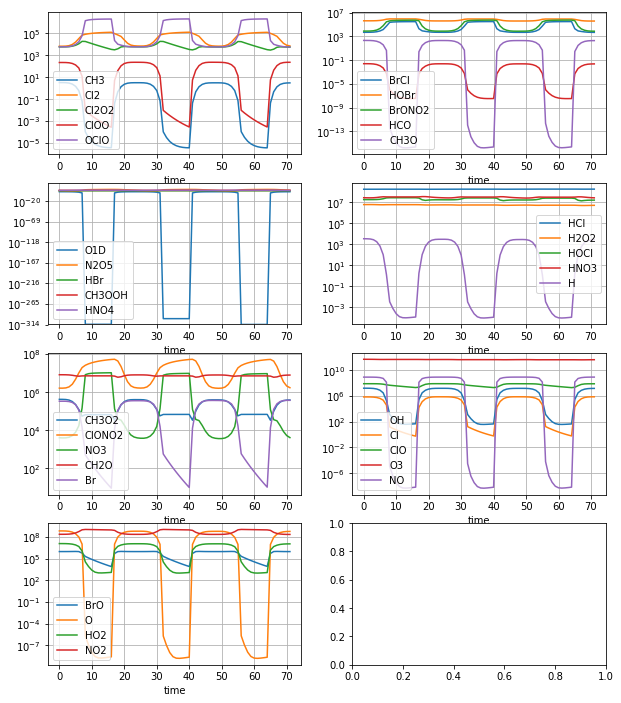

In [16]:
N_sub = 5 
N_figures = 8

fig, axes = plt.subplots(N_figures//2, 2, figsize=[10, 12])

for i in range(N_figures-1):
    sub_name = varnames[i*N_sub:(i+1)*N_sub]
    df_rerun.plot(y=sub_name, logy=True, grid=True, ax=axes.ravel()[i])